In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.3          ✔ dplyr   1.0.0     
✔ tidyr   1.1.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "simulatedhfdeaths"

In [2]:
#install.packages("survival")
#install.packages("ggplot")

library(survival) # this is the cornerstone command for survival analysis in R
library(ggplot2) # newer package that does nice plots
library(survminer)

Loading required package: ggpubr

Warning message:
“replacing previous import ‘ggplot2:::=’ by ‘data.table:::=’ when loading ‘survMisc’”


In [3]:
g <- read.csv(file = "../input/simulatedhfdeaths/simulated HF mort data for GMPH (1K) final.csv", header=TRUE, sep=',')

In [4]:
dim(g)

[1] 1000   31

In [5]:
head(g)

,id,death,los,age,gender,cancer,cabg,crt,defib,dementia,⋯,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,2,90,2,0,0,0,0,0,⋯,0,0,4,0,0,0,0,2,NA,416
2,2,0,10,74,1,0,0,0,0,0,⋯,0,1,9,1,0,0,0,4,1,648
3,3,0,3,83,2,0,0,0,0,0,⋯,0,0,1,0,0,0,0,3,1,466
4,4,0,1,79,1,0,0,0,0,0,⋯,1,0,9,2,1,1,0,5,1,441
5,5,0,17,94,2,0,0,0,0,0,⋯,0,0,3,0,0,0,0,2,1,371
6,6,0,47,89,1,0,0,0,0,0,⋯,0,1,3,0,0,0,0,3,NA,47


In [6]:
g[1:5,]

,id,death,los,age,gender,cancer,cabg,crt,defib,dementia,⋯,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,2,90,2,0,0,0,0,0,⋯,0,0,4,0,0,0,0,2,NA,416
2,2,0,10,74,1,0,0,0,0,0,⋯,0,1,9,1,0,0,0,4,1,648
3,3,0,3,83,2,0,0,0,0,0,⋯,0,0,1,0,0,0,0,3,1,466
4,4,0,1,79,1,0,0,0,0,0,⋯,1,0,9,2,1,1,0,5,1,441
5,5,0,17,94,2,0,0,0,0,0,⋯,0,0,3,0,0,0,0,2,1,371


In [7]:
gender <- as.factor(g[,"gender"]) # R calls categorical variables factors
fu_time <- g[,"fu_time"] # continuous variable (numeric) 
death <- g[,"death"] # binary variable (numeric) 

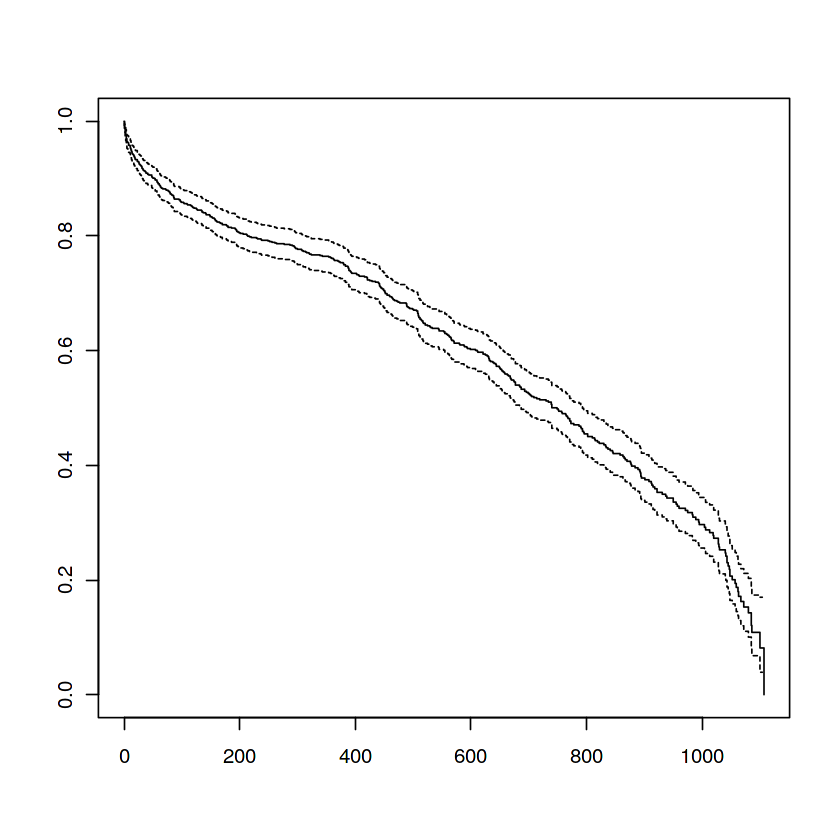

In [8]:
km_fit <- survfit(Surv(fu_time, death) ~ 1)

plot(km_fit)

In [9]:
summary(km_fit, times = c(1:7,30,60,90*(1:10))) 

Call: survfit(formula = Surv(fu_time, death) ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    992      12    0.988 0.00346        0.981        0.995
    2    973       7    0.981 0.00435        0.972        0.989
    3    963       5    0.976 0.00489        0.966        0.985
    4    954       6    0.970 0.00546        0.959        0.980
    5    945       5    0.964 0.00590        0.953        0.976
    6    938       1    0.963 0.00598        0.952        0.975
    7    933       1    0.962 0.00606        0.951        0.974
   30    865      39    0.921 0.00865        0.905        0.939
   60    809      28    0.891 0.01010        0.871        0.911
   90    770      24    0.864 0.01117        0.843        0.887
  180    698      43    0.815 0.01282        0.790        0.841
  270    653      24    0.787 0.01363        0.760        0.814
  360    619      21    0.761 0.01428        0.733        0.789
  450    525      44    0.705 0.01554        0.675   

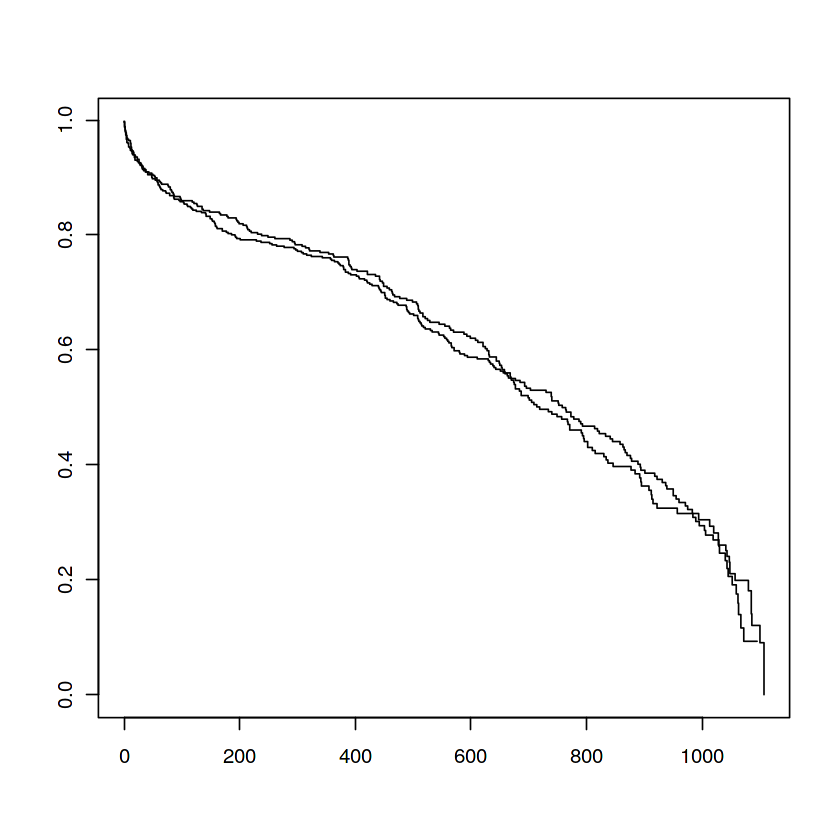

In [10]:
km_gender_fit <- survfit(Surv(fu_time, death) ~ gender) 

plot(km_gender_fit)

In [11]:
survdiff(Surv(fu_time, death) ~ gender, rho=0) 

Call:
survdiff(formula = Surv(fu_time, death) ~ gender, rho = 0)

           N Observed Expected (O-E)^2/E (O-E)^2/V
gender=1 548      268      271    0.0365     0.082
gender=2 452      224      221    0.0448     0.082

 Chisq= 0.1  on 1 degrees of freedom, p= 0.8 

In [12]:
age_65plus <- ifelse(g[,"age"]>=65,1,0) # dichotomise age
table(age_65plus, exclude = NULL) # inspect the numbers - always a good idea

age_65plus
  0   1 
115 885 

In [13]:
#table(age,age_65plus, exclude = NULL) # check - an even better idea...

In [14]:
# Now we're happy and can run the test:
survdiff(Surv(fu_time, death) ~ age_65plus, rho=0)

Call:
survdiff(formula = Surv(fu_time, death) ~ age_65plus, rho = 0)

               N Observed Expected (O-E)^2/E (O-E)^2/V
age_65plus=0 115       18       67     35.85      41.7
age_65plus=1 885      474      425      5.65      41.7

 Chisq= 41.7  on 1 degrees of freedom, p= 1e-10 

COX Model

In [15]:
cox <- coxph(Surv(fu_time, death) ~ age, data=g)
summary(cox)

Call:
coxph(formula = Surv(fu_time, death) ~ age, data = g)

  n= 1000, number of events= 492 

        coef exp(coef) se(coef)     z Pr(>|z|)    
age 0.056005  1.057602 0.005193 10.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    exp(coef) exp(-coef) lower .95 upper .95
age     1.058     0.9455     1.047     1.068

Concordance= 0.651  (se = 0.013 )
Likelihood ratio test= 138  on 1 df,   p=<2e-16
Wald test            = 116.3  on 1 df,   p=<2e-16
Score (logrank) test = 115.7  on 1 df,   p=<2e-16


1. Introduction to Non-convergence

In [16]:
cox2 <- coxph(Surv(fu_time, death) ~ age + gender + copd + quintile + ethnicgroup, data=g)

In [17]:
summary(cox2) 

Call:
coxph(formula = Surv(fu_time, death) ~ age + gender + copd + 
    quintile + ethnicgroup, data = g)

  n= 951, number of events= 468 
   (49 observations deleted due to missingness)

                 coef exp(coef)  se(coef)      z Pr(>|z|)    
age          0.064107  1.066206  0.005651 11.344  < 2e-16 ***
gender      -0.300110  0.740737  0.096029 -3.125  0.00178 ** 
copd         0.041406  1.042275  0.108304  0.382  0.70223    
quintile     0.061080  1.062984  0.034931  1.749  0.08036 .  
ethnicgroup  0.026464  1.026817  0.048312  0.548  0.58385    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            exp(coef) exp(-coef) lower .95 upper .95
age            1.0662     0.9379    1.0545    1.0781
gender         0.7407     1.3500    0.6137    0.8941
copd           1.0423     0.9594    0.8429    1.2888
quintile       1.0630     0.9407    0.9926    1.1383
ethnicgroup    1.0268     0.9739    0.9340    1.1288

Concordance= 0.664  (se = 0.013 )
Likelihood ratio t

In [18]:
summary(coxph(Surv(fu_time, death) ~ age + gender + copd + quintile + ethnicgroup, data=g[!is.null(g$quintile),]))

Call:
coxph(formula = Surv(fu_time, death) ~ age + gender + copd + 
    quintile + ethnicgroup, data = g[!is.null(g$quintile), ])

  n= 951, number of events= 468 
   (49 observations deleted due to missingness)

                 coef exp(coef)  se(coef)      z Pr(>|z|)    
age          0.064107  1.066206  0.005651 11.344  < 2e-16 ***
gender      -0.300110  0.740737  0.096029 -3.125  0.00178 ** 
copd         0.041406  1.042275  0.108304  0.382  0.70223    
quintile     0.061080  1.062984  0.034931  1.749  0.08036 .  
ethnicgroup  0.026464  1.026817  0.048312  0.548  0.58385    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            exp(coef) exp(-coef) lower .95 upper .95
age            1.0662     0.9379    1.0545    1.0781
gender         0.7407     1.3500    0.6137    0.8941
copd           1.0423     0.9594    0.8429    1.2888
quintile       1.0630     0.9407    0.9926    1.1383
ethnicgroup    1.0268     0.9739    0.9340    1.1288

Concordance= 0.664  (se = 0.

2. **Checking the proportionality assumption**

       chisq df    p
gender  1.24  1 0.26
GLOBAL  1.24  1 0.26


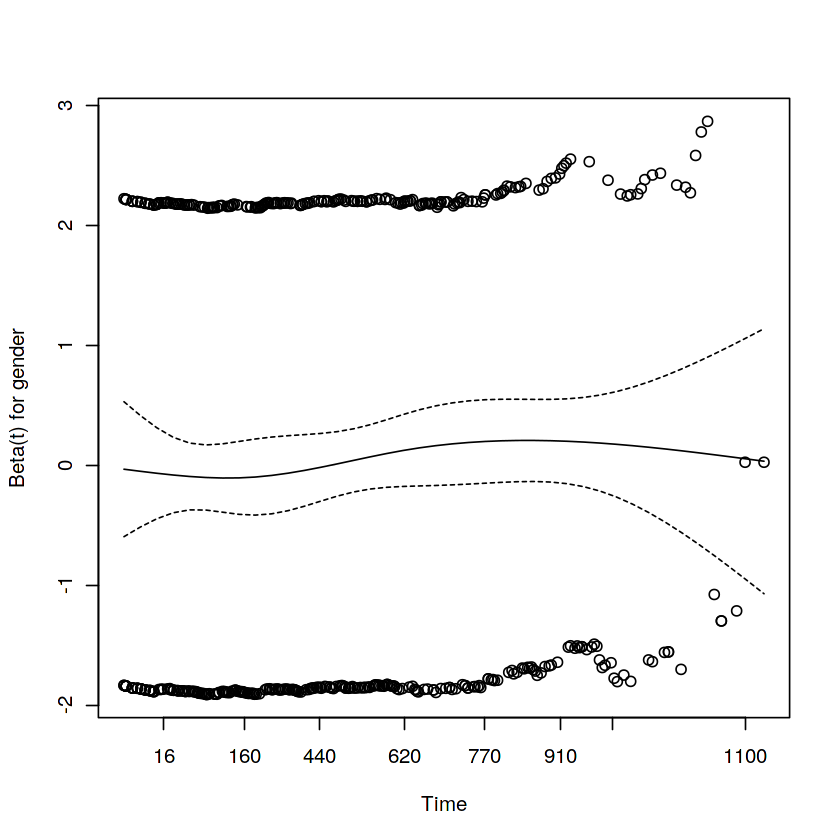

In [19]:
fit <- coxph(Surv(fu_time, death) ~ gender) # fit the desired model
temp <- cox.zph(fit)# apply the cox.zph function to the desired model

print(temp) # display the results

plot(temp) # plot the curves

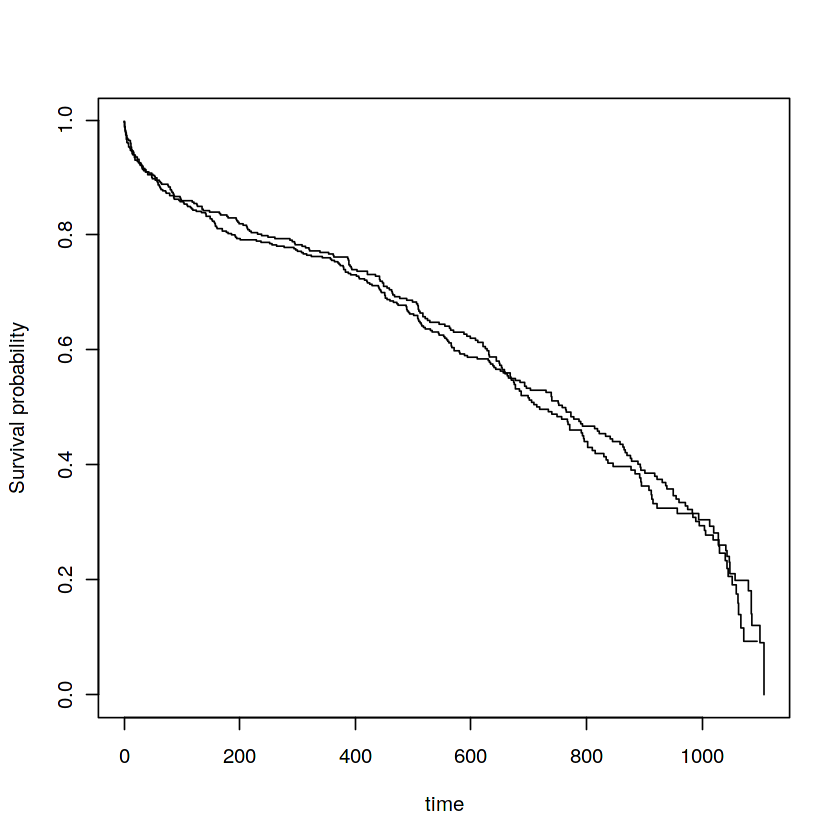

In [20]:
km_fit <- survfit(Surv(fu_time, death) ~ gender) 

plot(km_fit, xlab = "time", ylab = "Survival probability") # label the axes 

geting the same result using ggcoxzph()

**Using the other types of residuals in Cox regression (deviance residuals)**

type = “dfbeta” plots the estimated changes in the regression coefficients on deleting each observation (patient) in turn

`geom_smooth()` using formula 'y ~ x'



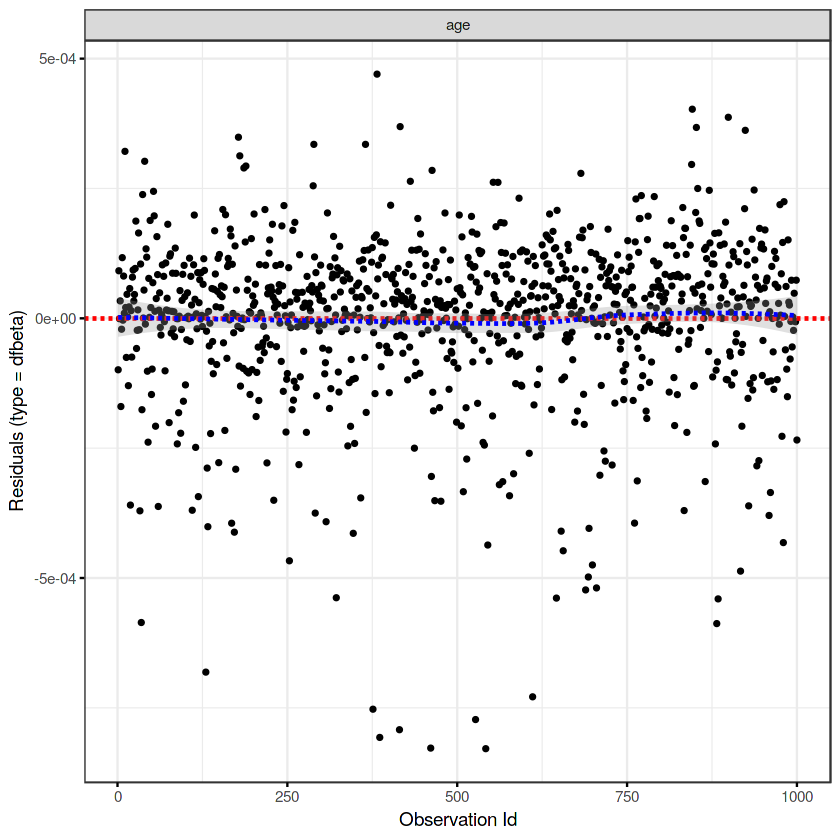

In [21]:
res.cox <- coxph(Surv(fu_time, death) ~ age,data=g) 
ggcoxdiagnostics(res.cox, type = "dfbeta", linear.predictions = FALSE, ggtheme = theme_bw()) 

`geom_smooth()` using formula 'y ~ x'



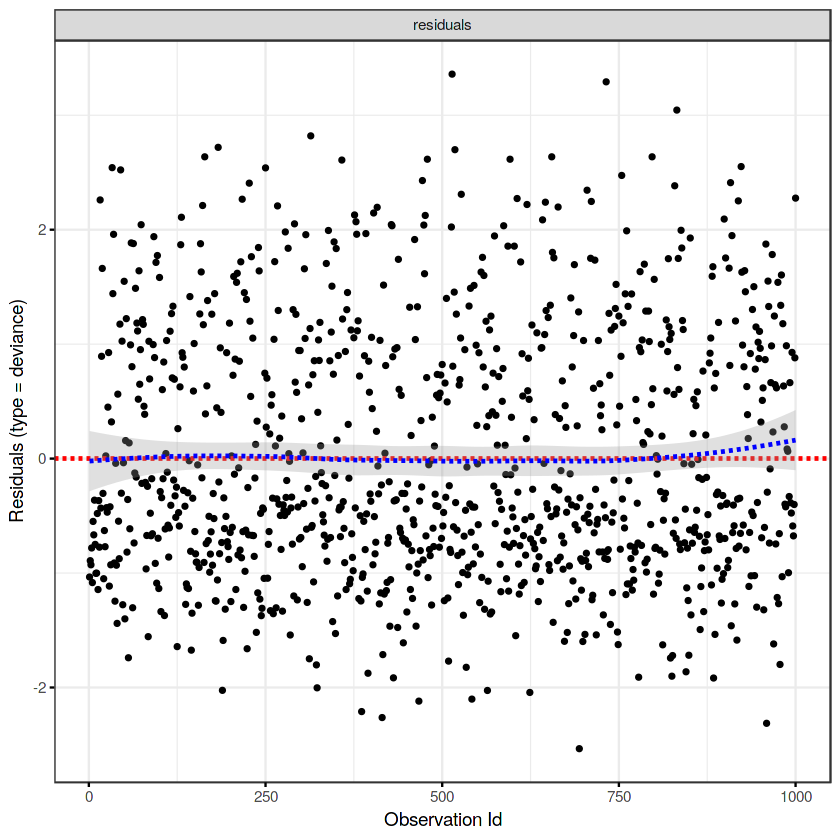

In [22]:
res.cox <- coxph(Surv(fu_time, death) ~ age , data=g) 
ggcoxdiagnostics(res.cox, type = "deviance", 
                 linear.predictions = FALSE, ggtheme = theme_bw()) 

* Positive values correspond to individuals that “died too soon” compared with expected survival times.
* Negative values correspond to individual that “lived too long” compared with expected survival times.
* Very large or small values are outliers, which are poorly predicted by the model.

Warning message:
“arguments formula is deprecated; will be removed in the next version; please use fit instead.”


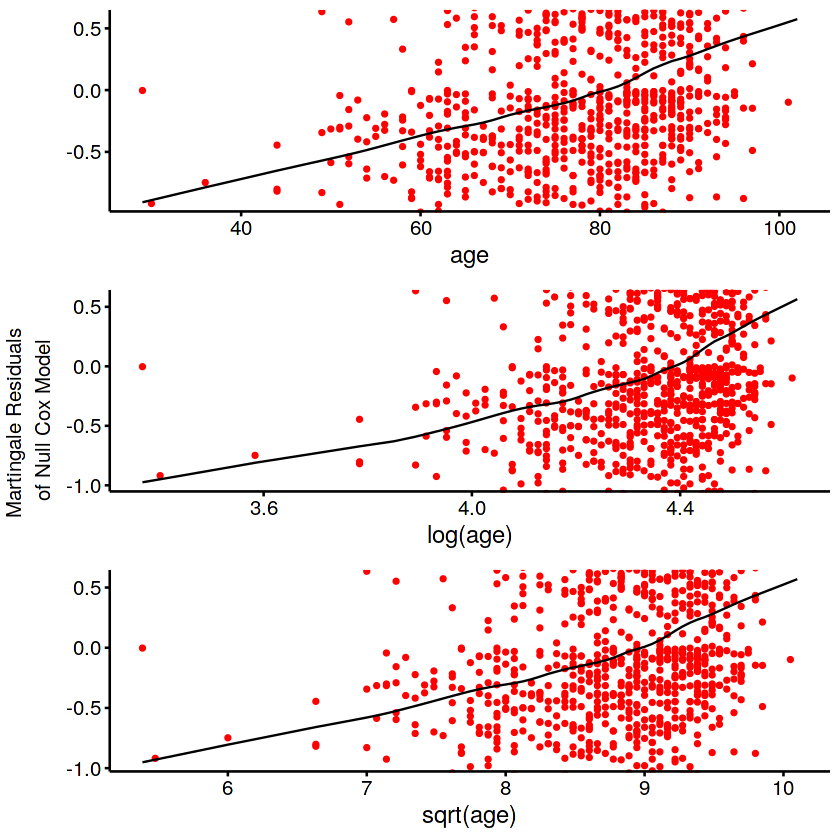

In [23]:
ggcoxfunctional(Surv(fu_time, death) ~ age + log(age) + sqrt(age), data=g) 

* Martingale residuals near 1 represent individuals that “died too soon”
* Large negative values correspond to individuals that “lived too long”

Quiz

       chisq df    p
copd    1.24  1 0.27
GLOBAL  1.24  1 0.27


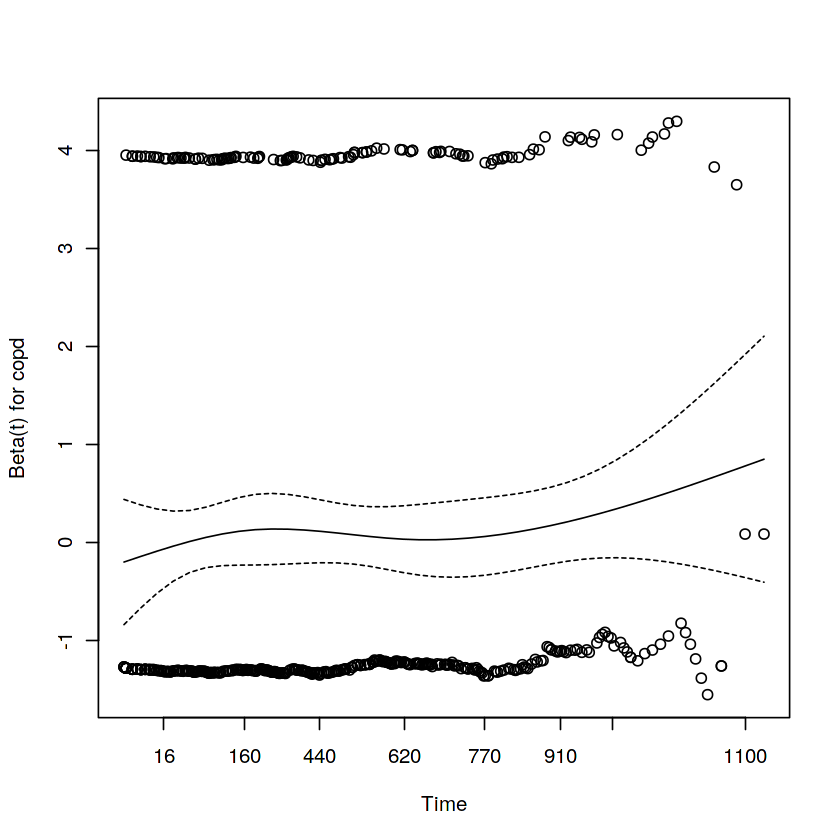

In [24]:
fit <- coxph(Surv(fu_time, death) ~ copd , data=g) # fit the desired model
temp <- cox.zph(fit)# apply the cox.zph function to the desired model

print(temp) # display the results

plot(temp) # plot the curves

       chisq df    p
copd    1.24  1 0.27
GLOBAL  1.24  1 0.27


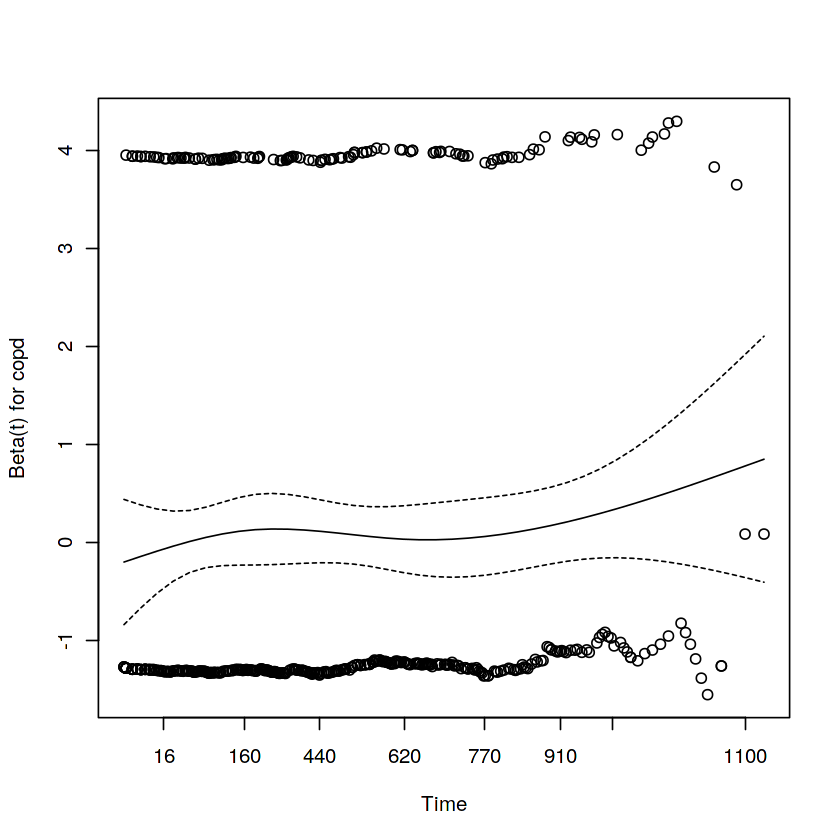

In [25]:
fit <- coxph(Surv(fu_time, death) ~ copd , data=g) # fit the desired model
temp <- cox.zph(fit)# apply the cox.zph function to the desired model

print(temp) # display the results

plot(temp) # plot the curves

**What to do if the proportionality assumption is not met**

Call: survfit(formula = Surv(fu_time, death) ~ 1)

      n  events  median 0.95LCL 0.95UCL 
   1000     492     749     687     793 


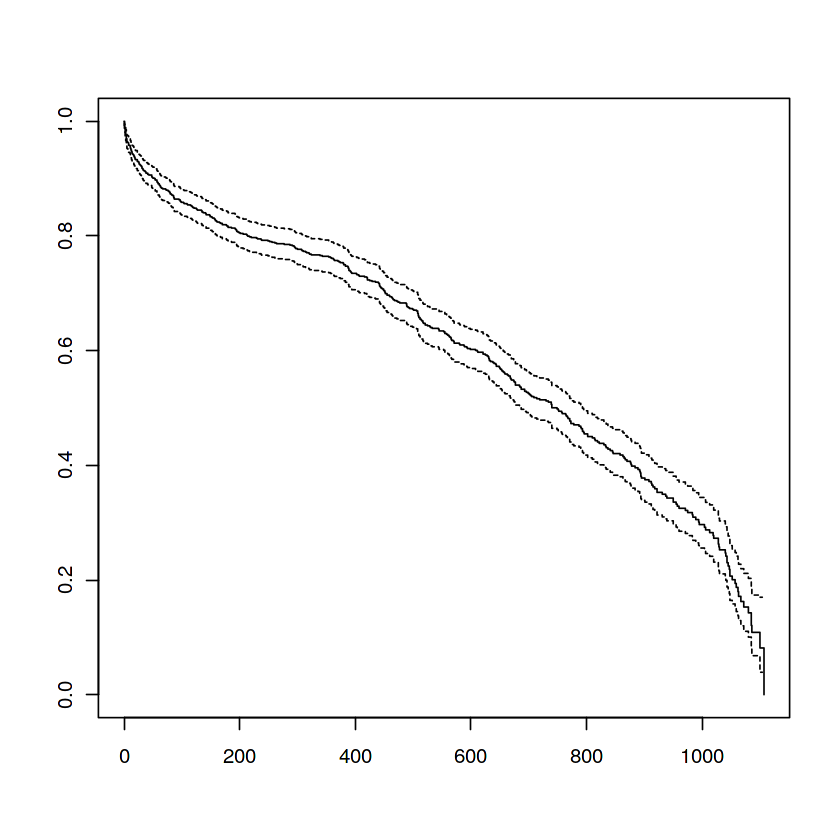

In [26]:
km_fit <-survfit(Surv(fu_time, death) ~ 1)

print(km_fit) # display the results


plot(km_fit)

In [27]:
survdiff(Surv(fu_time, death) ~ gender, rho=0)

Call:
survdiff(formula = Surv(fu_time, death) ~ gender, rho = 0)

           N Observed Expected (O-E)^2/E (O-E)^2/V
gender=1 548      268      271    0.0365     0.082
gender=2 452      224      221    0.0448     0.082

 Chisq= 0.1  on 1 degrees of freedom, p= 0.8 